Chap.19 오토인코더

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,_), (x_test, _) = mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
# 데이터 형태 변환
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32') / 255


In [7]:
autoencoder = Sequential()

# 인코딩 설계
autoencoder.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'))  # kernel_size=3 랑 (3,3) 같음
autoencoder.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  # 28*28 => 14*14
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same')) # 14*14 => 7*7
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same',strides=2)) # 7*7 => 4*4

#디코더 설계
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D())  # 4*4 => 8*8
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D())  # 8*8 => 16*16
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))  # 16*16*8 => 14*14*16
autoencoder.add(UpSampling2D())  # 14*14*16 => 28*28*16
autoencoder.add(Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))  # 28*28*16 => 28*28*1
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 64s 128ms/step - loss: 0.2131 - val_loss: 0.1397
Epoch 2/50
469/469 [==============================] - 57s 122ms/step - loss: 0.1300 - val_loss: 0.1217
Epoch 3/50
469/469 [==============================] - 58s 123ms/step - loss: 0.1181 - val_loss: 0.1127
Epoch 4/50
469/469 [==============================] - 57s 122ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 5/50
469/469 [==============================] - 58s 124ms/step - loss: 0.1065 - val_loss: 0.1039
Epoch 6/50
469/469 [==============================] - 57s 122ms/step - loss: 0.1035 - val_loss: 0.1008
Epoch 7/50
469/469 [==============================] - 58s 123ms/step - loss: 0.1011 - val_loss: 0.0989
Epoch 8/50
469/469 [==============================] - 55s 118ms/step - loss: 0.0992 - val_loss: 0.0973
Epoch 9/50
469/469 [==============================] - 56s 118ms/step - loss: 0.0978 - val_loss: 0.0959
Epoch 10/50
469/469 [==============================] - 58s 123ms/step - l

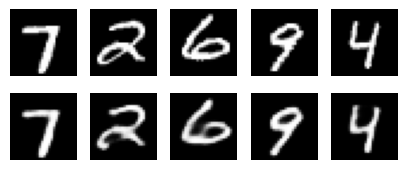

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

test_pred = np.random.randint(x_test.shape[0], size=5)   # 테스트 할 이미지의 idx를 랜덤으로 설정
test_img = autoencoder.predict(x_test) # 오토인코더(모델)을 사용하여 예상 이미지 출력(특징만 살린 이미지)

plt.figure(figsize=(5, 2))

for i, img in enumerate(test_pred):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(x_test[img].reshape(28,28), cmap='gray')
    ax.axis('off')
    
    ax = plt.subplot(2,5,1+i+5)
    plt.imshow(test_img[img].reshape(28,28), cmap='gray')
    ax.axis('off')
plt.show()
    